In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
import os 
os.chdir('C:/Users/Mounica Pothureddy/Documents/loanpredictionproj')

In [384]:
train_data=pd.read_csv("train_dataset.csv")
test_data=pd.read_csv("test_dataset.csv")

In [385]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [386]:
train_original=train_data.copy()
test_original=test_data.copy()

In [387]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [388]:
allcols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [389]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [390]:
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

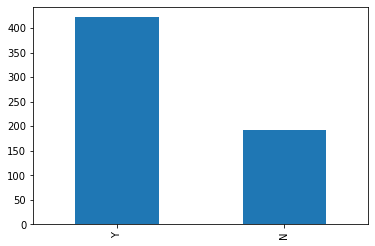

In [391]:
#Univariate Analysis
train_data['Loan_Status'].value_counts().plot.bar()

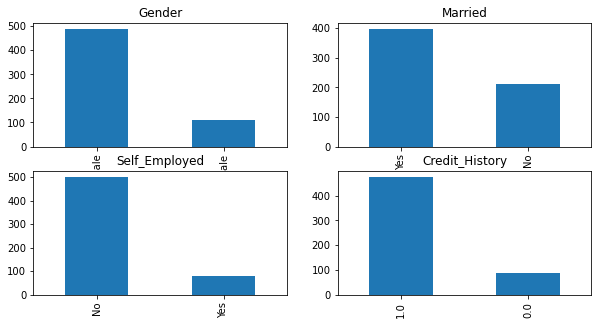

In [392]:
plt.subplot(221)
train_data['Gender'].value_counts().plot.bar(figsize=(10,5),title='Gender')
plt.subplot(222)
train_data['Married'].value_counts().plot.bar(figsize=(10,5),title='Married')
plt.subplot(223)
train_data['Self_Employed'].value_counts().plot.bar(figsize=(10,5),title='Self_Employed')
plt.subplot(224)
train_data['Credit_History'].value_counts().plot.bar(figsize=(10,5),title='Credit_History')
plt.show()

<AxesSubplot:>

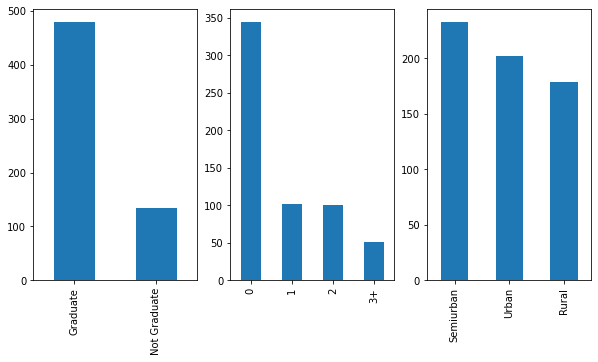

In [393]:
plt.subplot(131)
train_data['Education'].value_counts().plot.bar(figsize=(10,5))
plt.subplot(132)
train_data['Dependents'].value_counts().plot.bar(figsize=(10,5))
plt.subplot(133)
train_data['Property_Area'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:xlabel='Gender'>

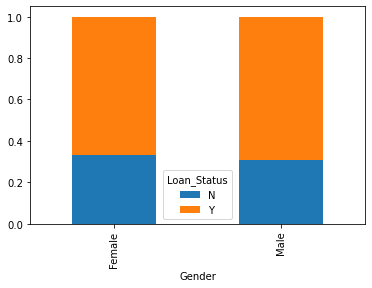

In [394]:
#BiVariate Analysis
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1),axis=0).plot.bar(stacked=True)

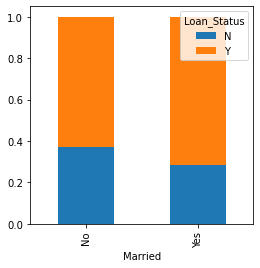

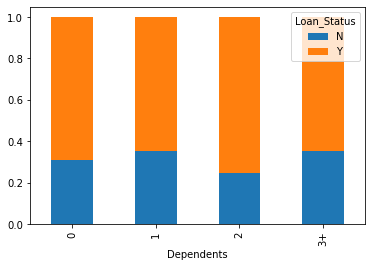

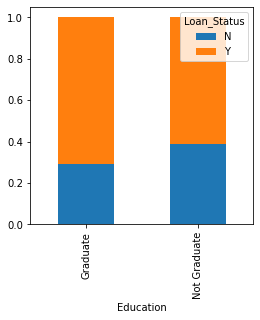

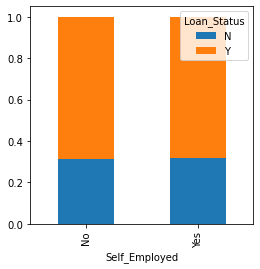

In [395]:
MarriedStatus=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependent=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
EducationInfo=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])

MarriedStatus.div(MarriedStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependent.div(Dependent.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

EducationInfo.div(EducationInfo.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

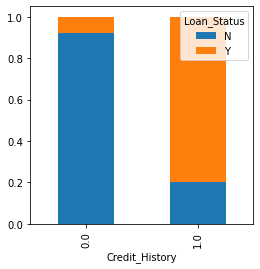

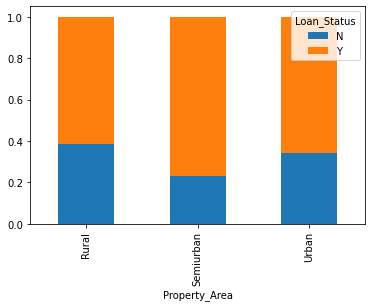

In [396]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

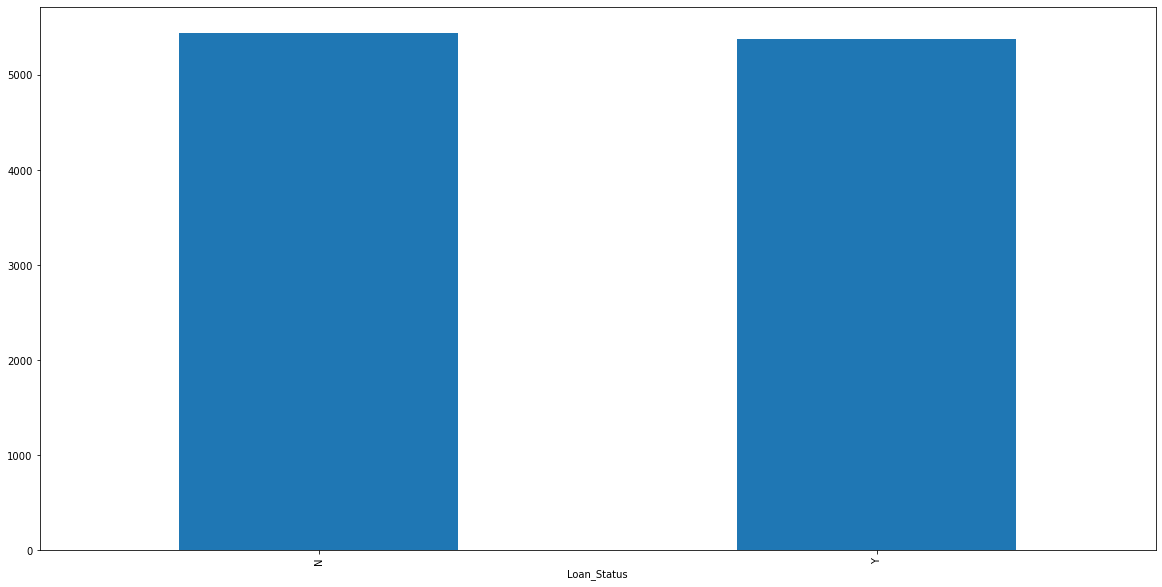

In [398]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(figsize=(20,10))

In [399]:
train_data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [413]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

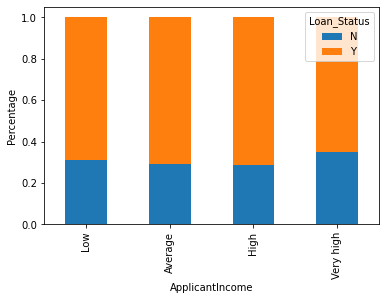

In [414]:
Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')


In [415]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_data['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

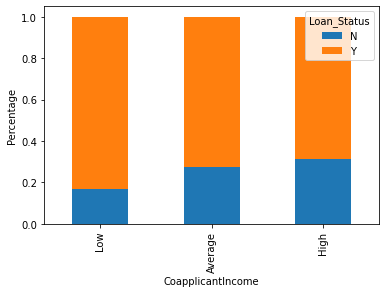

In [416]:
Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [417]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']

In [418]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)

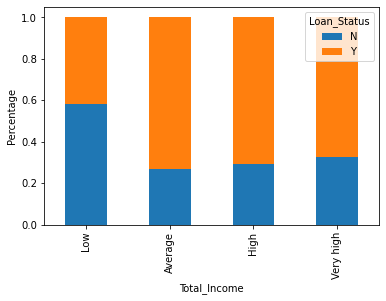

In [419]:
Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [420]:
train_data.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [421]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train_data['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

Text(0, 0.5, 'Percentage')

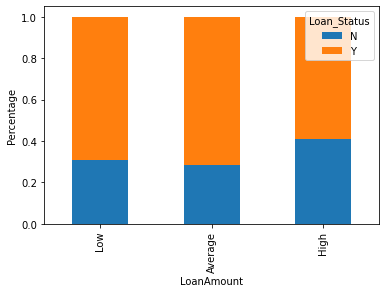

In [422]:
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1),axis=0).plot.bar(stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [423]:
train_data=train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [424]:
train_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)
train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

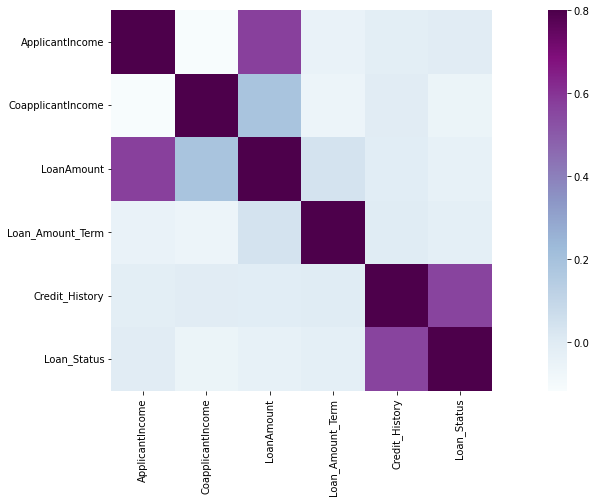

In [425]:
matrix = train_data.corr()
plt.subplots(figsize=(20,7))
sns.heatmap(matrix,vmax=0.8,cmap='BuPu',square=True)

In [426]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [427]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)

In [428]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [429]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [430]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)

In [431]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [432]:
test_data['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

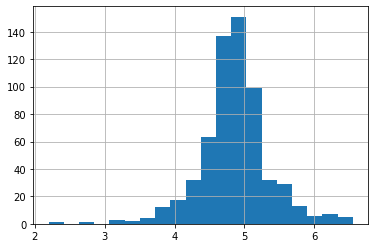

In [434]:
train_data['LoanAmount_Log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_Log'].hist(bins=20)
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [436]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_Log     614 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 67.3+ KB


In [437]:
train_data = train_data.drop('Loan_ID',axis=1)
test_data = test_data.drop('Loan_ID',axis=1)

In [438]:
X = train_data.drop('Loan_Status',axis=1)
Y = train_data.Loan_Status

In [439]:
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [440]:
from sklearn.model_selection import train_test_split

In [441]:
X_train, X_cv, Y_train, Y_cv = train_test_split(X,Y,test_size=0.3)

In [442]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [443]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [444]:
pred_cv = model.predict(X_cv)

In [445]:
accuracy_score(Y_cv,pred_cv)

0.7675675675675676

In [446]:
pred_test = model.predict(test_data)

In [447]:
submission=pd.read_csv("Sample.csv") #sample.csv--traindatafile with only loadid and loan status 

In [448]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [449]:
from sklearn.model_selection import KFold

In [450]:
from sklearn.model_selection import StratifiedKFold

In [451]:
i = 1
kf = StratifiedKFold(n_splits = 5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i += 1 
pred_test = model.predict(test_data)
pred = model.predict_proba(xvl)[:,1]
    


1 of kfold 5
accuracy score: 0.8048780487804879

2 of kfold 5
accuracy score: 0.8373983739837398

3 of kfold 5
accuracy score: 0.7804878048780488

4 of kfold 5
accuracy score: 0.7886178861788617

5 of kfold 5
accuracy score: 0.7950819672131147


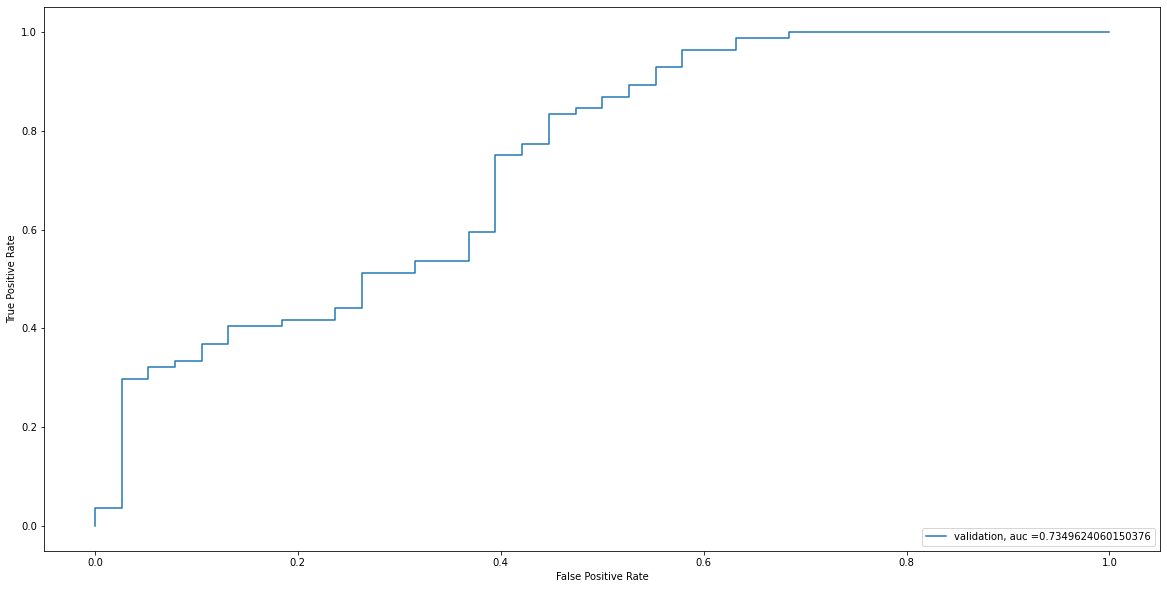

In [452]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,label='validation, auc =' +str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [453]:
submission['Loan_Status'] = pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [454]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [455]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

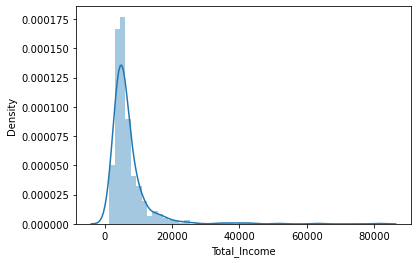

In [456]:
sns.distplot(train_data['Total_Income'])

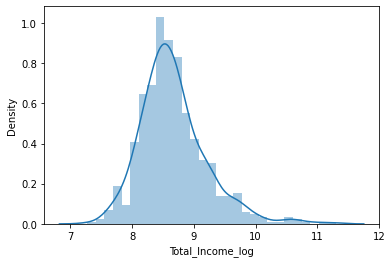

In [457]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

In [458]:
train_data['EMI'] = train_data['LoanAmount']/train_data['Loan_Amount_Term']
test_data['EMI'] = test_data['LoanAmount']/test_data['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

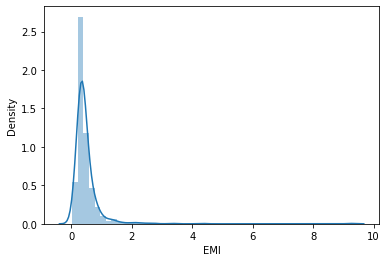

In [459]:
sns.distplot(train_data['EMI'])

In [460]:
train_data['Balance_Income'] = train_data['Total_Income'] - train_data['EMI']*1000
test_data['Balance_Income'] = test_data['Total_Income'] - test_data['EMI']*1000

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

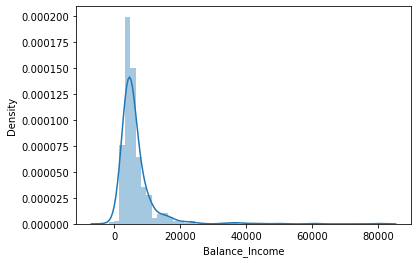

In [461]:
sns.distplot(train_data['Balance_Income'])

In [462]:
X = train_data.drop('Loan_Status',1)
Y = train_data.Loan_Status

In [463]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = Y[train_index], Y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i += 1 
pred_test = model.predict(test_data)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score: 0.7560975609756098

2 of kfold 5
accuracy score: 0.7235772357723578

3 of kfold 5
accuracy score: 0.7235772357723578

4 of kfold 5
accuracy score: 0.7804878048780488

5 of kfold 5
accuracy score: 0.7622950819672131


In [464]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_Log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income'],
      dtype='object')

In [465]:
from sklearn import tree

In [466]:
X = train_data.drop('Loan_Status',1)
Y = train_data.Loan_Status     

In [467]:
i = 1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = Y[train_index], Y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i += 1
pred_test = model.predict(test_data)


1 of kfold 5
accuracy score: 0.6991869918699187

2 of kfold 5
accuracy score: 0.7479674796747967

3 of kfold 5
accuracy score: 0.6666666666666666

4 of kfold 5
accuracy score: 0.6910569105691057

5 of kfold 5
accuracy score: 0.6885245901639344


In [468]:
from sklearn.ensemble import RandomForestClassifier

In [469]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i+=1
pred_test = model.predict(test_data)


1 of kfold 5
accuracy score: 0.8211382113821138

2 of kfold 5
accuracy score: 0.8292682926829268

3 of kfold 5
accuracy score: 0.8211382113821138

4 of kfold 5
accuracy score: 0.7804878048780488

5 of kfold 5
accuracy score: 0.7868852459016393


<AxesSubplot:>

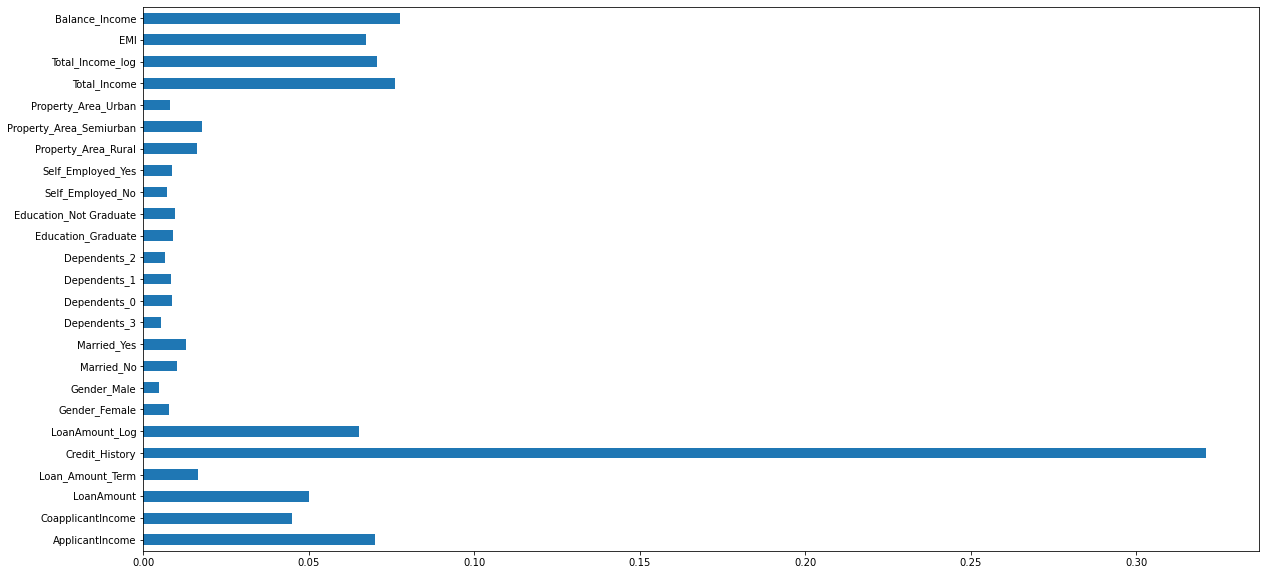

In [470]:
compare = pd.Series(model.feature_importances_,index=X.columns)
compare.plot.barh(figsize=(20,10))